<a href="https://colab.research.google.com/github/ShashankSatyam/Amazon_User_Segmentation/blob/main/Amazon_User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Amazon_User_Segmentation.csv')


In [ ]:
dataset.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219.0,M,23.0,306555.0,44.0
1,301220.0,F,26.0,306555.0,91.0
2,301221.0,F,24.0,326992.0,7.0
3,301222.0,M,28.0,326992.0,87.0
4,301223.0,F,38.0,347429.0,45.0


In [ ]:
dataset.shape

(999, 5)

In [ ]:
dataset.isnull().sum()

# not very good data as most of it is empty

Cus_ID    799
Sex       799
Age       799
Income    799
Rating    799
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

Cus_ID    0
Sex       0
Age       0
Income    0
Rating    0
dtype: int64

In [ ]:
X = dataset.iloc[:, 3:5].values

# only taking income and spending score from the dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

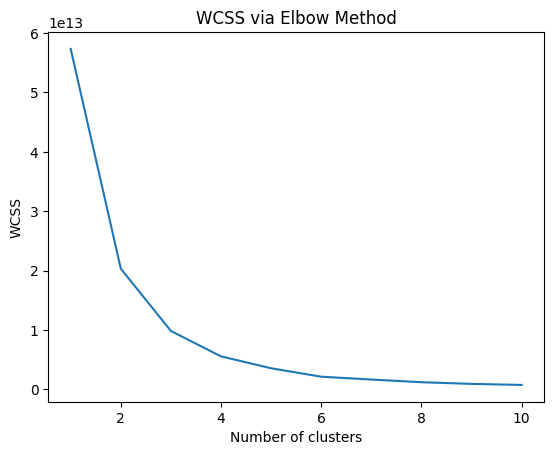

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# finding the optimum value of k (clusters) through this elbow method.

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


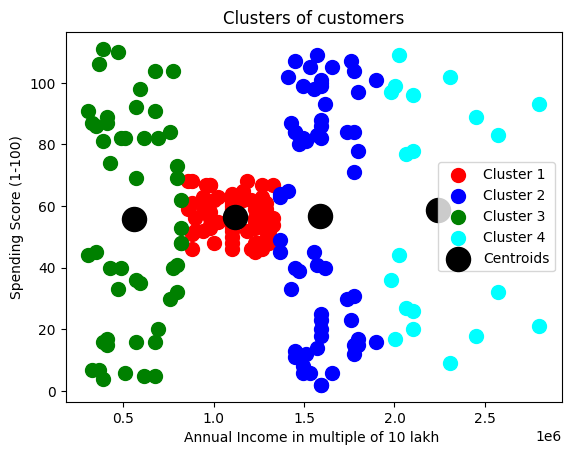

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income in multiple of 10 lakh ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
'''observations --- 1. for people of less income range i.e below 10 lakh spending score is widely spread
                        --- there are few who spend very less and there are some who spend too much
                        ---- for those earning between 10-15 lakh -- there spending habit is in a very specific range
                        ---

# to see the clustering as  age vs spending score

In [ ]:
''' now to see the scatterplot btwn age and spending score we will go for the following '''

In [ ]:
Y = dataset.iloc[:, 2:5:2].values

# just want to keep age and spending score in this new dataset

In [ ]:
print (Y)

[[ 23.  44.]
 [ 26.  91.]
 [ 24.   7.]
 [ 28.  87.]
 [ 38.  45.]
 [ 27.  86.]
 [ 42.   7.]
 [ 28. 106.]
 [ 77.   4.]
 [ 36.  81.]
 [ 81.  16.]
 [ 42. 111.]
 [ 70.  17.]
 [ 29.  87.]
 [ 45.  15.]
 [ 27.  89.]
 [ 42.  40.]
 [ 24.  74.]
 [ 63.  33.]
 [ 42. 110.]
 [ 42.  40.]
 [ 30.  82.]
 [ 56.   6.]
 [ 38.  82.]
 [ 65.  16.]
 [ 35.  92.]
 [ 54.  36.]
 [ 42.  69.]
 [ 48.  35.]
 [ 28.  98.]
 [ 72.   5.]
 [ 26.  82.]
 [ 64.   5.]
 [ 22. 104.]
 [ 59.  16.]
 [ 26.  91.]
 [ 51.  20.]
 [ 36.  82.]
 [ 44.  30.]
 [ 24.  84.]
 [ 78.  40.]
 [ 29. 104.]
 [ 58.  41.]
 [ 38.  69.]
 [ 59.  32.]
 [ 29.  73.]
 [ 60.  62.]
 [ 33.  53.]
 [ 35.  48.]
 [ 38.  48.]
 [ 59.  59.]
 [ 40.  68.]
 [ 38.  61.]
 [ 71.  68.]
 [ 60.  51.]
 [ 57.  46.]
 [ 62.  56.]
 [ 83.  52.]
 [ 33.  58.]
 [ 64.  52.]
 [ 84.  63.]
 [ 23.  62.]
 [ 81.  59.]
 [ 65.  67.]
 [ 76.  58.]
 [ 22.  67.]
 [ 52.  56.]
 [ 82.  54.]
 [ 23.  67.]
 [ 39.  53.]
 [ 84.  62.]
 [ 57.  48.]
 [ 72.  55.]
 [ 72.  63.]
 [ 71.  53.]
 [ 32.  61.]
 [ 54.  60.]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

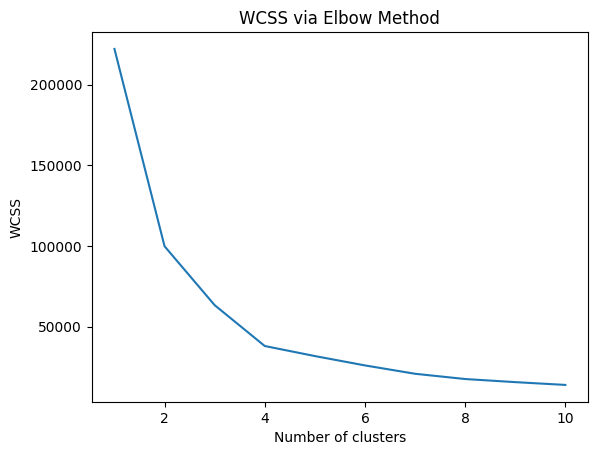

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(Y)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# just to comfirm  that the number of cluster we get by elbow method is the same in this case also

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


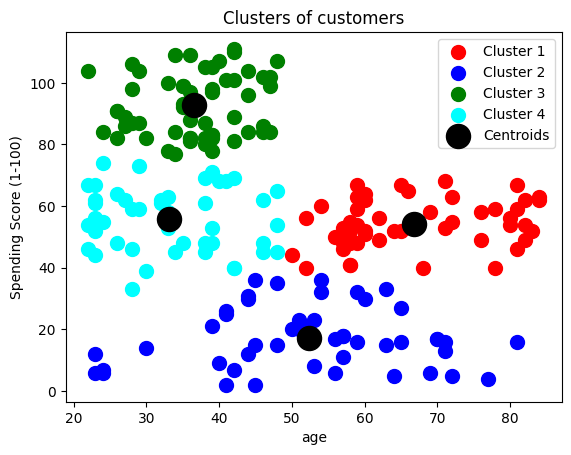

In [ ]:
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
''' the clusters we get when we plot the data age wise is very different
    --- those till age of 45 have mostly have spending score above 40
    ---  those above 50 age have spending score above 40 but they dont spend too much also
    ---- a good section of people between the age of 40 and 65 keep their spending score  till 40

In [ ]:
dataset.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219.0,M,23.0,306555.0,44.0
1,301220.0,F,26.0,306555.0,91.0
2,301221.0,F,24.0,326992.0,7.0
3,301222.0,M,28.0,326992.0,87.0
4,301223.0,F,38.0,347429.0,45.0


In [ ]:
df = dataset.drop(columns='Sex')
print(df)

# to keep all the data except for the sex column

       Cus_ID   Age     Income  Rating
0    301219.0  23.0   306555.0    44.0
1    301220.0  26.0   306555.0    91.0
2    301221.0  24.0   326992.0     7.0
3    301222.0  28.0   326992.0    87.0
4    301223.0  38.0   347429.0    45.0
..        ...   ...        ...     ...
195  301414.0  42.0  2452440.0    89.0
196  301415.0  54.0  2575062.0    32.0
197  301416.0  39.0  2575062.0    83.0
198  301417.0  39.0  2799869.0    21.0
199  301418.0  36.0  2799869.0    93.0

[200 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
print(dataset)

       Cus_ID  Sex   Age     Income  Rating
0    301219.0    1  23.0   306555.0    44.0
1    301220.0    0  26.0   306555.0    91.0
2    301221.0    0  24.0   326992.0     7.0
3    301222.0    1  28.0   326992.0    87.0
4    301223.0    0  38.0   347429.0    45.0
..        ...  ...   ...        ...     ...
195  301414.0    0  42.0  2452440.0    89.0
196  301415.0    0  54.0  2575062.0    32.0
197  301416.0    1  39.0  2575062.0    83.0
198  301417.0    1  39.0  2799869.0    21.0
199  301418.0    1  36.0  2799869.0    93.0

[200 rows x 5 columns]


In [ ]:
Z = dataset.iloc[:, :].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

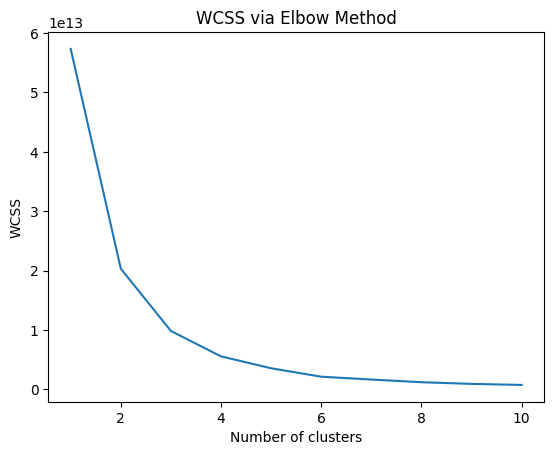

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(Z)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(Z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
''' For plotting data  should be two-dimensional. If it's not, we can use  PCA (Principal Component Analysis) to reduce its dimensions.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Z.shape

(200, 5)

In [ ]:
if Z.shape[1] > 2:
    pca = PCA(n_components=2)
    Z_2d = pca.fit_transform(Z)
else:
    Z_2d = Z

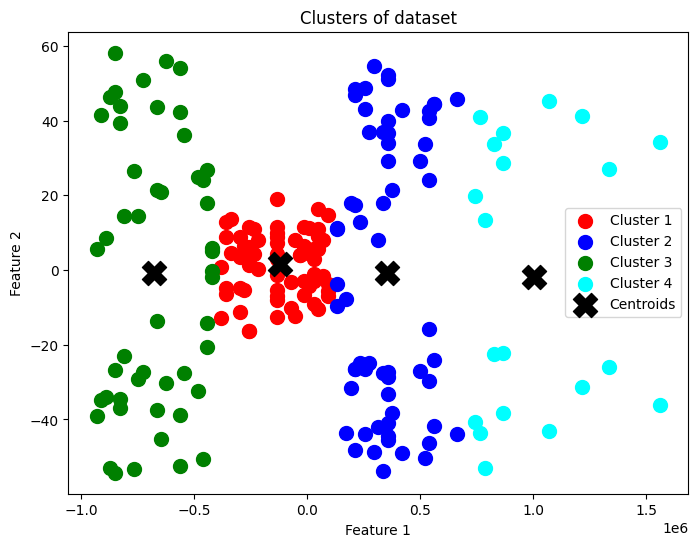

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Z_2d[y_kmeans == 0, 0], Z_2d[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(Z_2d[y_kmeans == 1, 0], Z_2d[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(Z_2d[y_kmeans == 2, 0], Z_2d[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(Z_2d[y_kmeans == 3, 0], Z_2d[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
centroids = kmeans.cluster_centers_
if Z.shape[1] > 2:
    centroids_2d = pca.transform(centroids)
else:
    centroids_2d = centroids

plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=300, c='black', label='Centroids', marker='X')

plt.title('Clusters of dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
''' this plot does not seem to make any sense '''

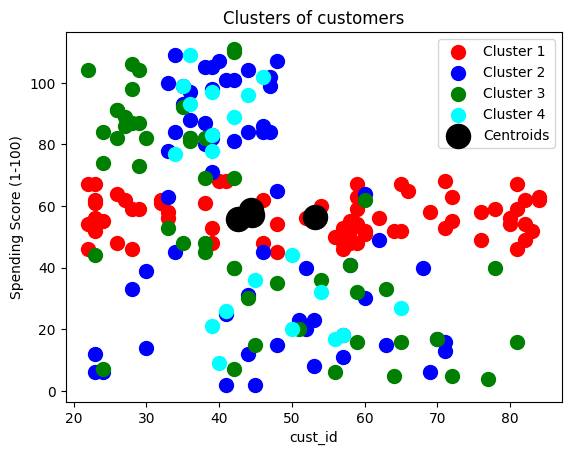

In [ ]:
plt.scatter(Z[y_kmeans == 0, 2], Z[y_kmeans == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 2], Z[y_kmeans == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 2], Z[y_kmeans == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 2], Z[y_kmeans == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('cust_id')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# unable to plot feature wise distribution --- like sex , age and spending score ----- sex, income and spending score --